## TP Support Vector Machine (SVM)

In [2]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
from time import time
from numpy import random as rd
from sklearn.decomposition import PCA
iris = datasets.load_iris()

### Question 1

In [5]:
X = iris.data
y = iris.target

#Training and test set
X_train = X[::2]
y_train = y[::2]
X_test = X[1::2]
y_test = y[1::2]
X1 = np.apply_along_axis(lambda x: x/np.linalg.norm(x),1,X)

X_test

array([[4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 3.4, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 3. , 1.6, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [5.1, 3.4, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [4.8, 3. , 1.4, 0.3],
       [4.6, 3.2, 1.4, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3.1, 4.4, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.6, 2

In [6]:
X_test[1]

array([4.6, 3.1, 1.5, 0.2])

In [5]:
#Linear kernel used
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
#Get support vectors
support = clf.support_vectors_
#Get indices of support vectors
support_indices = clf.support_
#Get number of support vectors for each class
nb_support = clf.n_support_

#Performance
y_prediction = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Performance of linear kernel: ",score)

Performance of linear kernel:  0.74


### Question 2

In [6]:
#Polynomial kernel used
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

#Performance
y_prediction = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Performance of polynomial kernel: ",score)

Performance of polynomial kernel:  0.72


/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Question 3

Nous voulons trouver 

$$ \text{arg min}_{\textbf w \in \mathcal H, \omega_0 \in \mathbb R, \xi\in \mathbb R^n} \Big(\frac12 \lVert \textbf w \lVert^2 + C \sum_{i=1}^n \xi_i \Big) $$

avec les contraintes :

\begin{align}
\forall i \in 1 \dots n,\;\;\; &\xi_i \geq 0 \\
&y_i(\langle \textbf w, \phi(\textbf x_i)\rangle + \omega_0) \geq 1-\xi_i \\
\\
i.e. \;\;\; & \xi_i \geq 0 \\
&\xi_i \geq 1-y_i(\langle \textbf w, \phi(\textbf x_i)\rangle + \omega_0)  \\
\\
i.e.\;\;\; &\xi_i \geq \min\big(0,1-y_i(\langle \textbf w, \phi(\textbf x_i)\rangle + \omega_0\big) \\
i.e. \;\;\; &\xi_i \geq \big[1-y_i(\langle \textbf w, \phi(\textbf x_i)\rangle + \omega_0\big]_+ \\
\end{align}

Or, comme $C \geq 0$ et $\xi_i \geq 0$, l'inégalité devient une égalité pour minimiser la somme.

D'où, on cherche :

$$ \text{arg min}_{\textbf w \in \mathcal H, \omega_0 \in \mathbb R} \Big(\frac12 \lVert \textbf w \lVert^2 + C \sum_{i=1}^n\big[1-y_i(\langle \textbf w, \phi(\textbf x_i)\rangle + \omega_0\big]_+ \Big) $$

### Question  4

La fonction $\mathbb 1_{\mathbb R^-}$ n'est pas convexe. On choisit donc une fonction convexe qui la majore, c'est la fonction Hinge.

Cette fonction peut être minimisée pour minimiser l'erreur de classification.

### SVM

We observe that when we reduce the parameter C, the margin increase
Sometimes, the separator hyperplan also change when we decrease the parameter C

### Question 5


Fitting the classifier to the training set with C=10** -5
Predicting the people names on the testing set
done in 0.513s
Chance level : 0.6210526315789474
Accuracy : 0.6789473684210526

Fitting the classifier to the training set with C=10** -4
Predicting the people names on the testing set
done in 0.321s
Chance level : 0.6210526315789474
Accuracy : 0.8894736842105263

Fitting the classifier to the training set with C=10** -3
Predicting the people names on the testing set
done in 0.348s
Chance level : 0.6210526315789474
Accuracy : 0.8789473684210526

Fitting the classifier to the training set with C=10** -2
Predicting the people names on the testing set
done in 0.344s
Chance level : 0.6210526315789474
Accuracy : 0.8789473684210526

Fitting the classifier to the training set with C=10** -1
Predicting the people names on the testing set
done in 0.543s
Chance level : 0.6210526315789474
Accuracy : 0.8789473684210526

Fitting the classifier to the training set with C=10** 0
Predicting the pe

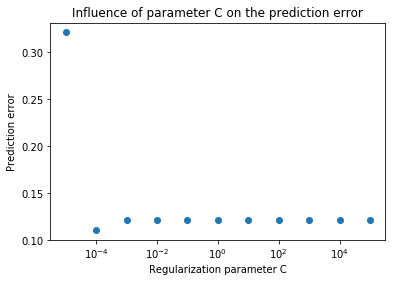

In [7]:
#Import the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] // 2], indices[X.shape[0] // 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

####################################################################
# Quantitative evaluation of the model quality on the test set
C = [];
Score = [];
for i in range(11):
    exp = -5+i;
    C.append(10**(exp))
    print("\nFitting the classifier to the training set with C=10**", exp)
    t1 = time()
    #TODO : fit a classifier
    clf = SVC(kernel='linear', C=10**(exp))
    clf.fit(X_train, y_train)
    print("Predicting the people names on the testing set")
    t0 = time()
    # TODO : predict labels for the X_test images
    y_prediction = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print("done in %0.3fs" % (t0 - t1))
    print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
    print("Accuracy : %s" % clf.score(X_test, y_test))
    Score.append(1-clf.score(X_test, y_test))

plt.figure()
plt.plot(C, Score, 'o')
plt.xlabel("Regularization parameter C")
plt.ylabel("Prediction error")
plt.xscale('log')
plt.title("Influence of parameter C on the prediction error")
plt.show()

### Question 6

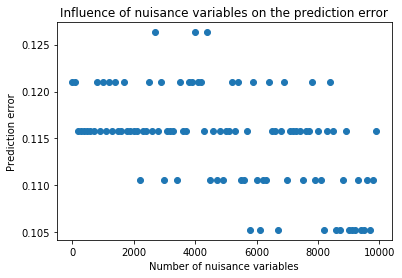

In [24]:
#Number of nuisance variables
clf = SVC(kernel='linear')
max = 100
nb_noise = [100*i for i in range(max)];
score =[0*i for i in range(max)]
for i in range(max):
    X_train_noise = np.c_[X_train, rd.rand(190,nb_noise[i])]
    X_test_noise = np.c_[X_test, rd.rand(190,nb_noise[i])]
    clf.fit(X_train_noise, y_train)
    score[i] = (1 - clf.score(X_test_noise, y_test))

plt.figure()
plt.plot(nb_noise, score, 'o')
plt.xlabel("Number of nuisance variables")
plt.ylabel("Prediction error")
plt.title("Influence of nuisance variables on the prediction error")
plt.show()  

### Question 8

In [17]:
#Kernel RBF
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
print("Prediction error: ", 1 - clf.score(X_test, y_test))
print("The prediction error is a bit worse, let's try a dimension reduction")

/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Prediction error:  0.13157894736842102
The prediction error is a bit worse, let's try a dimension reduction


In [16]:
#Dimension reduction
pca = PCA(n_components=100)
pca.fit(X_train,y_train)
pca.score(X_test, y_test)

-18135.74

### Question 8

(190, 60000)